<a href="https://colab.research.google.com/github/DCajiao/Aplicaciones-del-Analisis-Espacial/blob/main/casos/Situaci%C3%B3n_2/00_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Carga y Revisión Inicial de Datos**

In [118]:
import requests
import pandas as pd
import numpy as np
from io import BytesIO

library_url = "https://raw.githubusercontent.com/DCajiao/workshop003_Machine_learning_and_Data_streaming/refs/heads/main/src/utils/analysis_functions.py"
analysis_functions_py = requests.get(library_url).text
with open("analysis_functions.py", "w") as f:
    f.write(analysis_functions_py)

import analysis_functions as af


In [119]:
# Importación de Datos
DATA_GITHUB_URL = f'https://raw.githubusercontent.com/DCajiao/Aplicaciones-del-Analisis-Espacial/refs/heads/main/casos/Situación_2/data/input/AccidentesFatales'

df_2009 = pd.read_excel(BytesIO(requests.get(f'{DATA_GITHUB_URL}_2009.xlsx').content), engine='openpyxl')
df_2010 = pd.read_excel(BytesIO(requests.get(f'{DATA_GITHUB_URL}_2010.xlsx').content), engine='openpyxl')

In [120]:
af.summary_by_columns(df_2009)

,Column,Data Type,Missing Values,Unique Values,Duplicates,Missing Values (%)
0,MES FALLECIMIENTO,object,0,12,310,0.00
1,MES ACCIDENTE,object,0,12,310,0.00
2,BARRIO,object,0,175,147,0.00
3,COM,int64,0,22,300,0.00
4,PROFESION,object,35,90,231,10.87
5,SEXO,object,2,2,319,0.62
6,EDAD,float64,6,79,242,1.86
7,EDAD AGRUPADA,object,6,17,304,1.86
8,FECHA ACCIDENTE,datetime64[ns],0,213,109,0.00
9,FECHA FALLECIMIENTO,datetime64[ns],0,193,129,0.00


In [121]:
af.summary_by_columns(df_2010)

,Column,Data Type,Missing Values,Unique Values,Duplicates,Missing Values (%)
0,MES FALLECIMIENTO,object,0,12,268,0.00
1,MES ACCIDENTE,object,0,13,267,0.00
2,BARRIO,object,0,157,123,0.00
3,COM,int64,0,22,258,0.00
4,PROFESION,object,31,82,197,11.07
5,SEXO,object,0,2,278,0.00
6,EDAD,float64,4,72,207,1.43
7,EDAD AGRUPADA,object,4,16,263,1.43
8,FECHA ACCIDENTE,datetime64[ns],0,194,86,0.00
9,FECHA FALLECIMIENTO,datetime64[ns],0,200,80,0.00


In [122]:
# Mostrar registros con coordenadas nulas
df_2009[df_2009['coordenada X (km)'].isnull() | df_2009['coordenada Y (km)'].isnull()]

,MES FALLECIMIENTO,MES ACCIDENTE,BARRIO,COM,PROFESION,SEXO,EDAD,EDAD AGRUPADA,FECHA ACCIDENTE,FECHA FALLECIMIENTO,...,DIA SEMANA FALLECIMIENTO,DIA SEMANA ACCIDENTE,LUGAR INSP.,CONDICCION,VEHICULOS,Ciudad,coordenada X (metros),coordenada Y (metros),coordenada X (km),coordenada Y (km)


In [123]:
df_2010[df_2010['coordenada X (km)'].isnull() | df_2010['coordenada Y (km)'].isnull()]

,MES FALLECIMIENTO,MES ACCIDENTE,BARRIO,COM,PROFESION,SEXO,EDAD,EDAD AGRUPADA,FECHA ACCIDENTE,FECHA FALLECIMIENTO,...,DIA SEMANA ACCIDENTE,FECHA INSP.,LUGAR INSP.,CONDICCION,VEHICULOS,Ciudad,coordenada X (metros),coordenada Y (metros),coordenada X (km),coordenada Y (km)
53,MARZO,MARZO,LA MARIA,22,COMERCIANTE,F,29.0,25-29,2010-03-15,2010-03-15,...,Lunes,2010-03-15,H.U.V.,PAS. MOTO,MOTO - CAMIONETA,cali,NaN,NaN,NaN,NaN
164,JULIO,JULIO,QUINTAS DE DON SIMON,17,INDEPENDIENTE,M,60.0,60-64,2010-07-02,2010-07-27,...,Viernes,2010-07-27,CL. VALLE LILI,CICLISTA,TAXI - BICICLETA,cali,NaN,NaN,NaN,NaN
184,AGOSTO,AGOSTO,PORTADA,1,COMERCIANTE,M,22.0,20-24,2010-08-20,2010-08-20,...,Viernes,2010-08-20,VIA,COND. MOTO,MOTO - CAMPERO,cali,NaN,NaN,NaN,NaN


In [124]:
print(df_2009.columns)
print(df_2010.columns)

Index(['MES FALLECIMIENTO', 'MES ACCIDENTE', 'BARRIO', 'COM', 'PROFESION',
       'SEXO', 'EDAD', 'EDAD AGRUPADA', 'FECHA ACCIDENTE',
       'FECHA FALLECIMIENTO', 'HORA FALLECIMIENTO', 'HORA ACCIDENTE',
       'DIA SEMANA FALLECIMIENTO', 'DIA SEMANA ACCIDENTE', 'LUGAR INSP.',
       'CONDICCION', 'VEHICULOS', 'Ciudad', 'coordenada X (metros)',
       'coordenada Y (metros)', 'coordenada X (km)', 'coordenada Y (km)'],
      dtype='object')
Index(['MES FALLECIMIENTO', 'MES ACCIDENTE', 'BARRIO', 'COM', 'PROFESION',
       'SEXO', 'EDAD', 'EDAD AGRUPADA', 'FECHA ACCIDENTE',
       'FECHA FALLECIMIENTO', 'HORA FALLECIMIENTO', 'HORA ACCIDENTE',
       'DIA SEMANA FALLECIMIENTO', 'DIA SEMANA ACCIDENTE', 'FECHA INSP.',
       'LUGAR INSP.', 'CONDICCION', 'VEHICULOS', 'Ciudad',
       'coordenada X (metros)', 'coordenada Y (metros)', 'coordenada X (km)',
       'coordenada Y (km)'],
      dtype='object')


In [125]:
# Tienen las mismas columnas?
print(set(df_2009.columns) - set(df_2010.columns))
print(set(df_2010.columns) - set(df_2009.columns))

set()
{'FECHA INSP.'}


In [126]:
# Eliminar la columna FECHA INSP.
df_2010.drop(columns=['FECHA INSP.'], inplace=True)

In [127]:
# Hacer un merge de los datos creando la etiqueta AÑO_DATA:
df_2009['AÑO_DATA'] = 2009
df_2010['AÑO_DATA'] = 2010

df = pd.concat([df_2009, df_2010])

In [128]:
af.summary_by_columns(df)

,Column,Data Type,Missing Values,Unique Values,Duplicates,Missing Values (%)
0,MES FALLECIMIENTO,object,0,12,590,0.00
1,MES ACCIDENTE,object,0,13,589,0.00
2,BARRIO,object,0,263,339,0.00
3,COM,int64,0,22,580,0.00
4,PROFESION,object,66,138,463,10.96
5,SEXO,object,2,2,599,0.33
6,EDAD,float64,10,84,517,1.66
7,EDAD AGRUPADA,object,10,18,583,1.66
8,FECHA ACCIDENTE,datetime64[ns],0,407,195,0.00
9,FECHA FALLECIMIENTO,datetime64[ns],0,393,209,0.00


In [129]:
df.shape

(602, 23)

In [130]:
# Eliminar registros con valores nulos en SEXO, EDAD AGRUPADA
df.dropna(subset=['SEXO', 'EDAD AGRUPADA'], inplace=True)

# Eliminar registros con coordenadas nulas
df.dropna(subset=['coordenada X (km)', 'coordenada Y (km)'], inplace=True)

In [131]:
af.summary_by_columns(df)

,Column,Data Type,Missing Values,Unique Values,Duplicates,Missing Values (%)
0,MES FALLECIMIENTO,object,0,12,577,0.00
1,MES ACCIDENTE,object,0,13,576,0.00
2,BARRIO,object,0,259,330,0.00
3,COM,int64,0,22,567,0.00
4,PROFESION,object,57,138,450,9.68
5,SEXO,object,0,2,587,0.00
6,EDAD,float64,0,84,505,0.00
7,EDAD AGRUPADA,object,0,18,571,0.00
8,FECHA ACCIDENTE,datetime64[ns],0,400,189,0.00
9,FECHA FALLECIMIENTO,datetime64[ns],0,388,201,0.00


In [132]:
df['MES ACCIDENTE'].value_counts().sort_index()

MES ACCIDENTE
ABRIL         55
AGOSTO        49
DICIEMBRE     58
ENERO         48
FEBRERO       49
JULIO         42
JUNIO         61
MARZO         43
MAYO          53
NOVIEMBRE     50
OCTOBRE        1
OCTUBRE       34
SEPTIEMBRE    46
Name: count, dtype: int64

In [133]:
# Renombrar OCTOBRE a OCTUBRE
df['MES ACCIDENTE'] = df['MES ACCIDENTE'].replace('OCTOBRE', 'OCTUBRE')

In [134]:
# ¿Cuantos vehículos únicos hay en el dataset?
print(df['CONDICCION'].nunique())


25


In [135]:
df['VEHICULOS'].unique()

array(['MOTO - VOLCAMIENTO', 'MOTO - MICROBUS COOMOEPAL',
       'BICICLETA - CAMION', 'MOTO - TAXI', 'MOTO - TRACTOCAMION',
       'MOTO - POSTE', 'PEATON - MOTO', 'CAMPERO - MICROBUS - AUTOMOVIL',
       'BUSETA PANCE - OBJETO FIJO', 'PEATON - TAXI',
       'MOTO - AUTO (FUGA)', 'PEATON - CAMPERO', 'CAMPERO - ARBOL',
       'MOTO - AUTO ', 'MOTO - AUTO', 'TRACTOCAMION - PEATON',
       'BICICLETA - VEHICULO EN FUGA', 'MOTO - AUTOMOVIL', 'TAXI - POSTE',
       'MOTO - BUSETA RECREATIVOS', 'MOTO - CAMIONETA EMSIRVA',
       'MOTO - BUSETA ERMITA', 'PEATON - BUSETA ALAMEDA',
       'MOTO - MICROBUS ', 'MOTO - MOTO', 'MOTO - PEATON',
       'PEATON - AUTOMOVIL', 'MOTO - MICROBUS', 'AUTOMOVIL - ARBOL',
       'CAMION - PEATON', 'VOLQUETA - CAIDA OCUPANTE',
       'MOTO - MURO (CAIDA PUENTE)', 'BICICLETA - BUSETA  RECREATIVOS',
       'PEATON - BUS PADRON DEL MIO', 'MOTO - CAMIONETA  ',
       'MOTO - CAMION', 'PEATON - BUS BOLIVARIANO',
       'MOTO - BUSETA MONTEBELLO', 'BICICLETA - BUS 

In [136]:
# Diccionario de estandarización
map_cond = {
    # Conductores
    "COND. MOTO": "CONDUCTOR MOTO",
    "COND. MOTOCARRO": "CONDUCTOR MOTOCARRO",
    "COND. AUTO": "CONDUCTOR AUTOMOVIL",
    "COND. TAXI": "CONDUCTOR TAXI",
    "COND.TAXI": "CONDUCTOR TAXI",
    "CONDUCTOR TAXI": "CONDUCTOR TAXI",
    "CONDUCTOR VOLQUETA": "CONDUCTOR VOLQUETA",
    "CONDUCTOR": "CONDUCTOR AUTOMOVIL",
    
    # Pasajeros
    "PASAJERO": "PASAJERO",
    "PASAJERA": "PASAJERO",
    "PASAJERO AUTO": "PASAJERO AUTOMOVIL",
    "PAS. AUTOMOVIL": "PASAJERO AUTOMOVIL",
    "PAS. AUTO": "PASAJERO AUTOMOVIL",
    "PAS. MOTO": "PASAJERO MOTO",
    "PAS. VOLQUETA": "PASAJERO VOLQUETA",
    "PAS. BUSETA": "PASAJERO BUSETA",
    "PAS. CAMPERO": "PASAJERO CAMPERO",
    "PAS. MICROBUS": "PASAJERO MICROBUS",
    "PAS. BUS": "PASAJERO BUS",
    "PAS. TAXI": "PASAJERO TAXI",
    "PAS. CAMION ": "PASAJERO CAMION",
    "PAS. BICICLETA": "PASAJERO BICICLETA",
    
    # Otros
    "PEATON": "PEATON",
    "PEATON ": "PEATON",
    "CICLISTA": "CICLISTA"
}

# Normalizar la columna
df["CONDICCION_STD"] = df["CONDICCION"].replace(map_cond)

# Ver categorías únicas estandarizadas
print("Categorías únicas estandarizadas:")
print(df["CONDICCION_STD"].unique())

# Contar vehículos únicos
n_unicos = df["CONDICCION_STD"].nunique()
print(f"\nNúmero de categorías únicas estandarizadas: {n_unicos}")


Categorías únicas estandarizadas:
['CONDUCTOR MOTO' 'CICLISTA' 'PEATON' 'PASAJERO' 'PASAJERO MOTO'
 'CONDUCTOR AUTOMOVIL' 'PASAJERO AUTOMOVIL' 'PASAJERO VOLQUETA'
 'PASAJERO BUSETA' 'PASAJERO CAMPERO' 'CONDUCTOR MOTOCARRO'
 'PASAJERO MICROBUS' 'CONDUCTOR TAXI' 'CONDUCTOR VOLQUETA'
 'PASAJERO BICICLETA' 'PASAJERO BUS' 'PASAJERO TAXI' 'PASAJERO CAMION']

Número de categorías únicas estandarizadas: 18


In [137]:
import pandas as pd
import re

# Normalización
def limpiar_texto(x):
    x = x.upper().strip()
    x = re.sub(r'\s+', ' ', x)                     # espacios múltiples → uno
    x = re.sub(r'\(.*?\)', '', x)                  # elimina texto entre paréntesis
    x = re.sub(r'[^A-ZÑ0-9\s\-]', '', x)           # elimina símbolos raros
    x = x.replace('AUTO ', 'AUTOMOVIL ')           # uniformar "AUTO" → "AUTOMOVIL"
    x = x.replace('AUTO', 'AUTOMOVIL')             # reemplazo final
    x = x.replace('M OTO', 'MOTO')                 # errores tipográficos comunes
    return x.strip(' -')

df["VEHICULOS_LIMPIO"] = df["VEHICULOS"].apply(limpiar_texto)


In [138]:
tipos_vehiculos = {
    "MOTO": "Motocicleta",
    "BICICLETA": "Bicicleta",
    "PEATON": "Peatón",
    "AUTOMOVIL": "Automóvil particular",
    "TAXI": "Taxi",
    "BUSETA": "Bus",
    "BUS": "Bus",
    "MICROBUS": "Bus",
    "CAMPERO": "Campero",
    "CAMIONETA": "Camioneta",
    "CAMION": "Camión",
    "TRACTOCAMION": "Camión",
    "VOLQUETA": "Volqueta",
    "OBJETO FIJO": "Objeto fijo"
}

In [139]:
def extraer_tipos(texto):
    tipos = []
    for parte in texto.split('-'):
        parte = parte.strip()
        for clave in tipos_vehiculos:
            if clave in parte:
                tipos.append(tipos_vehiculos[clave])
    return list(set(tipos))  # sin duplicados

df["CATEGORIAS"] = df["VEHICULOS_LIMPIO"].apply(extraer_tipos)


In [140]:
for tipo in tipos_vehiculos.values():
    df[tipo] = df["CATEGORIAS"].apply(lambda lst: tipo in lst)


In [141]:
df.columns

Index(['MES FALLECIMIENTO', 'MES ACCIDENTE', 'BARRIO', 'COM', 'PROFESION',
       'SEXO', 'EDAD', 'EDAD AGRUPADA', 'FECHA ACCIDENTE',
       'FECHA FALLECIMIENTO', 'HORA FALLECIMIENTO', 'HORA ACCIDENTE',
       'DIA SEMANA FALLECIMIENTO', 'DIA SEMANA ACCIDENTE', 'LUGAR INSP.',
       'CONDICCION', 'VEHICULOS', 'Ciudad', 'coordenada X (metros)',
       'coordenada Y (metros)', 'coordenada X (km)', 'coordenada Y (km)',
       'AÑO_DATA', 'CONDICCION_STD', 'VEHICULOS_LIMPIO', 'CATEGORIAS',
       'Motocicleta', 'Bicicleta', 'Peatón', 'Automóvil particular', 'Taxi',
       'Bus', 'Campero', 'Camioneta', 'Camión', 'Volqueta', 'Objeto fijo'],
      dtype='object')

In [142]:
df[["CATEGORIAS"]]

,CATEGORIAS
0,[Motocicleta]
1,"[Bus, Motocicleta]"
2,"[Camión, Bicicleta]"
3,"[Taxi, Motocicleta]"
4,"[Camión, Motocicleta]"
...,...
275,"[Peatón, Motocicleta]"
276,"[Campero, Peatón]"
277,"[Taxi, Peatón]"
278,"[Automóvil particular, Peatón]"


In [143]:
df[['VEHICULOS', 'CATEGORIAS',
    'Motocicleta', 'Bicicleta', 'Peatón', 'Automóvil particular', 'Taxi',
    'Bus', 'Campero', 'Camioneta', 'Camión',
    'Volqueta', 'Objeto fijo']]

,VEHICULOS,CATEGORIAS,Motocicleta,Bicicleta,Peatón,Automóvil particular,Taxi,Bus,Campero,Camioneta,Camión,Volqueta,Objeto fijo
0,MOTO - VOLCAMIENTO,[Motocicleta],True,False,False,False,False,False,False,False,False,False,False
1,MOTO - MICROBUS COOMOEPAL,"[Bus, Motocicleta]",True,False,False,False,False,True,False,False,False,False,False
2,BICICLETA - CAMION,"[Camión, Bicicleta]",False,True,False,False,False,False,False,False,True,False,False
3,MOTO - TAXI,"[Taxi, Motocicleta]",True,False,False,False,True,False,False,False,False,False,False
4,MOTO - TRACTOCAMION,"[Camión, Motocicleta]",True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,MOTO - PEATON,"[Peatón, Motocicleta]",True,False,True,False,False,False,False,False,False,False,False
276,PEATON - CAMPERO,"[Campero, Peatón]",False,False,True,False,False,False,True,False,False,False,False
277,PEATON - TAXI EN FUGA,"[Taxi, Peatón]",False,False,True,False,True,False,False,False,False,False,False
278,PEATON - AUTO,"[Automóvil particular, Peatón]",False,False,True,True,False,False,False,False,False,False,False


##### **Clasificación para `CATEGORIA_MOTOR`**

| Categoría general        | Tipos de vehículo incluidos                                                           | Criterio técnico                                                              |
| ------------------------ | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Sin Automotor**        | Peatón, Bicicleta, Objeto fijo                                                        | No existe vehículo motorizado implicado.                                      |
| **Automotor pequeño**    | Motocicleta, Automóvil particular, Taxi                                               | Vehículos de baja o media cilindrada, de uso personal o liviano.              |
| **Automotor mediano**    | Campero, Camioneta, Bus                                                               | Vehículos de pasajeros o carga ligera de mayor volumen y potencia.            |
| **Automotor grande**     | Camión, Volqueta                                                                      | Vehículos pesados de carga o transporte, con motor de gran capacidad.         |
| **Automotor industrial** | Maquinaria especial (si aparece en el dataset, ej. grúa, mezcladora, maquinaria vial) | Vehículos industriales o especializados, generalmente no de tránsito regular. |


In [145]:
def clasificar_motor(row):
    # Jerarquía de tamaño (de mayor a menor)
    if row.get('Automotor industrial', 0) == 1:
        return 'Automotor industrial'
    elif row.get('Volqueta', 0) == 1 or row.get('Camión', 0) == 1:
        return 'Automotor grande'
    elif row.get('Bus', 0) == 1 or row.get('Camioneta', 0) == 1 or row.get('Campero', 0) == 1:
        return 'Automotor mediano'
    elif row.get('Motocicleta', 0) == 1 or row.get('Automóvil particular', 0) == 1 or row.get('Taxi', 0) == 1:
        return 'Automotor pequeño'
    elif row.get('Peatón', 0) == 1 or row.get('Bicicleta', 0) == 1 or row.get('Objeto fijo', 0) == 1:
        return 'Sin Automotor'
    else:
        return 'Sin información'

# Aplicar la función fila por fila
df['CATEGORIA_MOTOR'] = df.apply(clasificar_motor, axis=1)

# Revisar la distribución de la nueva clasificación
print(df['CATEGORIA_MOTOR'].value_counts())

CATEGORIA_MOTOR
Automotor pequeño    362
Automotor mediano    109
Automotor grande      92
Sin Automotor         26
Name: count, dtype: int64


In [ ]:
df.columns

Index(['MES FALLECIMIENTO', 'MES ACCIDENTE', 'BARRIO', 'COM', 'PROFESION',
       'SEXO', 'EDAD', 'EDAD AGRUPADA', 'FECHA ACCIDENTE',
       'FECHA FALLECIMIENTO', 'HORA FALLECIMIENTO', 'HORA ACCIDENTE',
       'DIA SEMANA FALLECIMIENTO', 'DIA SEMANA ACCIDENTE', 'LUGAR INSP.',
       'CONDICCION', 'VEHICULOS', 'Ciudad', 'coordenada X (metros)',
       'coordenada Y (metros)', 'coordenada X (km)', 'coordenada Y (km)',
       'AÑO_DATA', 'CONDICCION_STD', 'VEHICULOS_LIMPIO', 'CATEGORIAS',
       'Motocicleta', 'Bicicleta', 'Peatón', 'Automóvil particular', 'Taxi',
       'Bus', 'Campero', 'Camioneta', 'Camión', 'Volqueta', 'Objeto fijo',
       'CATEGORIA_MOTOR'],
      dtype='object')

In [149]:
# Mostar todas las columnas
pd.set_option('display.max_columns', None)


df.head()

,MES FALLECIMIENTO,MES ACCIDENTE,BARRIO,COM,PROFESION,SEXO,EDAD,EDAD AGRUPADA,FECHA ACCIDENTE,FECHA FALLECIMIENTO,HORA FALLECIMIENTO,HORA ACCIDENTE,DIA SEMANA FALLECIMIENTO,DIA SEMANA ACCIDENTE,LUGAR INSP.,CONDICCION,VEHICULOS,Ciudad,coordenada X (metros),coordenada Y (metros),coordenada X (km),coordenada Y (km),AÑO_DATA,CONDICCION_STD,VEHICULOS_LIMPIO,CATEGORIAS,Motocicleta,Bicicleta,Peatón,Automóvil particular,Taxi,Bus,Campero,Camioneta,Camión,Volqueta,Objeto fijo,CATEGORIA_MOTOR
0,ENERO,ENERO,NARANJOS,14,NaN,M,18.0,15-19,2009-01-01,2009-01-01,06:00:00,06:00:00,JUEVES,JUEVES,VIA,COND. MOTO,MOTO - VOLCAMIENTO,cali,1.066292e+06,872267.143537,1066.291737,872.267144,2009,CONDUCTOR MOTO,MOTO - VOLCAMIENTO,[Motocicleta],True,False,False,False,False,False,False,False,False,False,False,Automotor pequeño
1,ENERO,ENERO,SAN PEDRO,11,S.I.,M,40.0,40-44,2009-01-01,2009-01-01,21:00:00,21:00:00,JUEVES,JUEVES,VIA,COND. MOTO,MOTO - MICROBUS COOMOEPAL,cali,1.063515e+06,870366.139557,1063.514536,870.366140,2009,CONDUCTOR MOTO,MOTO - MICROBUS COOMOEPAL,"[Bus, Motocicleta]",True,False,False,False,False,True,False,False,False,False,False,Automotor mediano
2,ENERO,ENERO,BRISAS DE LOS ALAMOS,2,AUX. MANTENIMIENTO,M,40.0,40-44,2009-01-02,2009-01-02,18:00:00,18:00:00,VIERNES,VIERNES,VIA,CICLISTA,BICICLETA - CAMION,cali,1.063678e+06,877547.614225,1063.677636,877.547614,2009,CICLISTA,BICICLETA - CAMION,"[Camión, Bicicleta]",False,True,False,False,False,False,False,False,True,False,False,Automotor grande
3,ENERO,ENERO,VALLE GRANDE,21,MECANICO,M,27.0,25-29,2009-01-04,2009-01-04,00:00:00,00:00:00,DOMINGO,DOMINGO,VIA,COND. MOTO,MOTO - TAXI,cali,1.066299e+06,872264.137321,1066.298564,872.264137,2009,CONDUCTOR MOTO,MOTO - TAXI,"[Taxi, Motocicleta]",True,False,False,False,True,False,False,False,False,False,False,Automotor pequeño
4,ENERO,ENERO,TERRON COLORADO,1,ESTUDIANTE,M,18.0,15-19,2009-01-03,2009-01-03,14:00:00,14:00:00,SABADO,SABADO,VIA,COND. MOTO,MOTO - TRACTOCAMION,cali,1.055973e+06,873501.871537,1055.972568,873.501872,2009,CONDUCTOR MOTO,MOTO - TRACTOCAMION,"[Camión, Motocicleta]",True,False,False,False,False,False,False,False,True,False,False,Automotor grande


<Axes: xlabel='FECHA ACCIDENTE'>

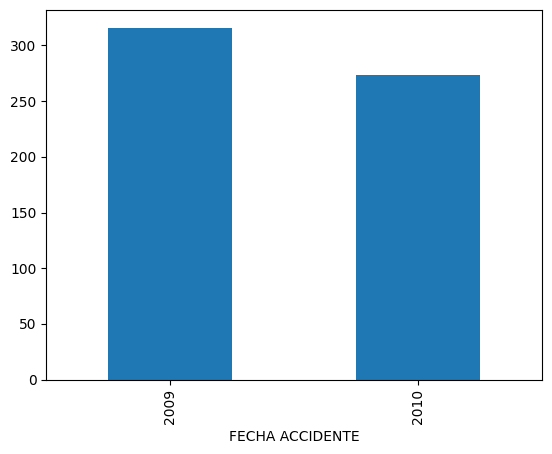

In [ ]:
df['FECHA ACCIDENTE'] = pd.to_datetime(df['FECHA ACCIDENTE'])
df['FECHA FALLECIMIENTO'] = pd.to_datetime(df['FECHA FALLECIMIENTO'])

df['FECHA ACCIDENTE'].dt.year.value_counts().sort_index().plot(kind="bar")


<Axes: ylabel='MES ACCIDENTE'>

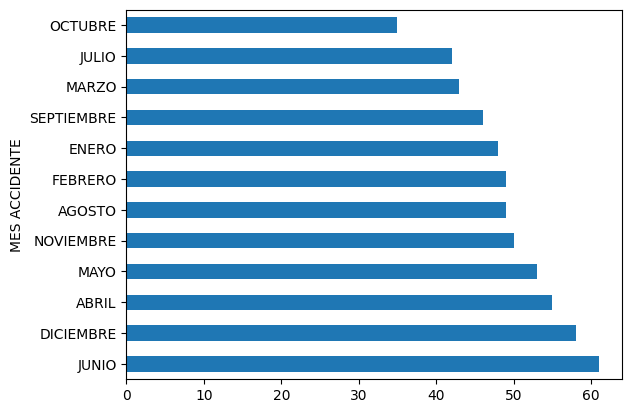

In [ ]:
df['MES ACCIDENTE'].value_counts().plot(kind="barh")

<Axes: ylabel='DIA SEMANA ACCIDENTE'>

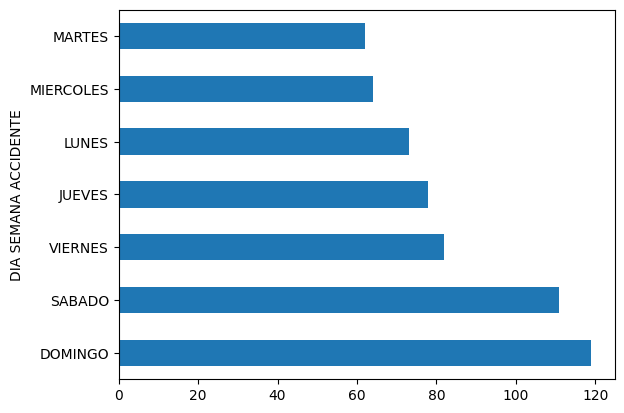

In [157]:
df['DIA SEMANA ACCIDENTE'] = df['DIA SEMANA ACCIDENTE'].str.upper().str.strip()
df['DIA SEMANA ACCIDENTE'].value_counts().plot(kind="barh")

<Axes: xlabel='SEXO'>

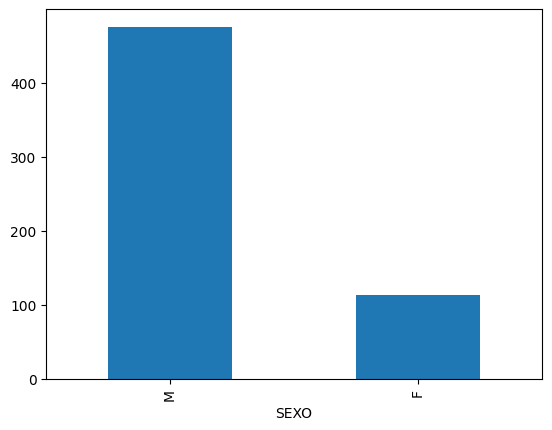

In [158]:
df['SEXO'].value_counts().plot(kind="bar")


<Axes: ylabel='EDAD AGRUPADA'>

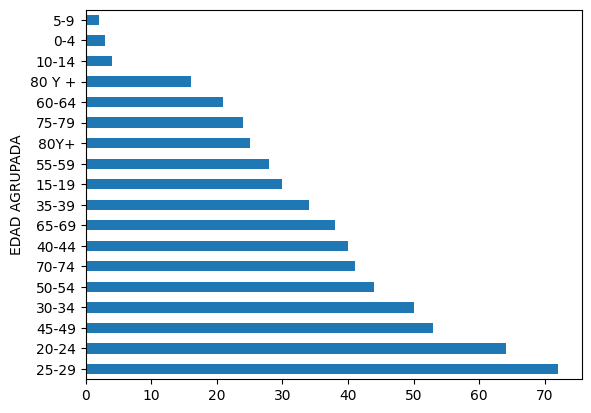

In [ ]:
df['EDAD AGRUPADA'].value_counts().plot(kind="barh")


In [161]:
df['CONDICCION_STD'].value_counts().head(10)


CONDICCION_STD
PEATON                 219
CONDUCTOR MOTO         206
CICLISTA                84
PASAJERO MOTO           37
CONDUCTOR AUTOMOVIL     12
PASAJERO CAMPERO         6
PASAJERO                 4
PASAJERO AUTOMOVIL       4
PASAJERO BUSETA          3
PASAJERO MICROBUS        3
Name: count, dtype: int64

In [163]:
df['VEHICULOS_LIMPIO'].value_counts().head(10)

VEHICULOS_LIMPIO
PEATON - MOTO              54
MOTO - VOLCAMIENTO         52
MOTO - PEATON              42
MOTO - AUTOMOVILMOVIL      22
MOTO - MOTO                22
PEATON - AUTOMOVILMOVIL    19
MOTO - CAMION              16
MOTO - BICICLETA           16
MOTO - CAMIONETA           12
PEATON - VEH FUGA          10
Name: count, dtype: int64

In [165]:
df['CATEGORIA_MOTOR'].value_counts().head(10)

CATEGORIA_MOTOR
Automotor pequeño    362
Automotor mediano    109
Automotor grande      92
Sin Automotor         26
Name: count, dtype: int64

In [167]:
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------------------------------  19.1/19.2 MB 109.7 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 75.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 96.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 91.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Usando borde: BordeComunasMetros.shp
CRS del borde: EPSG:3115


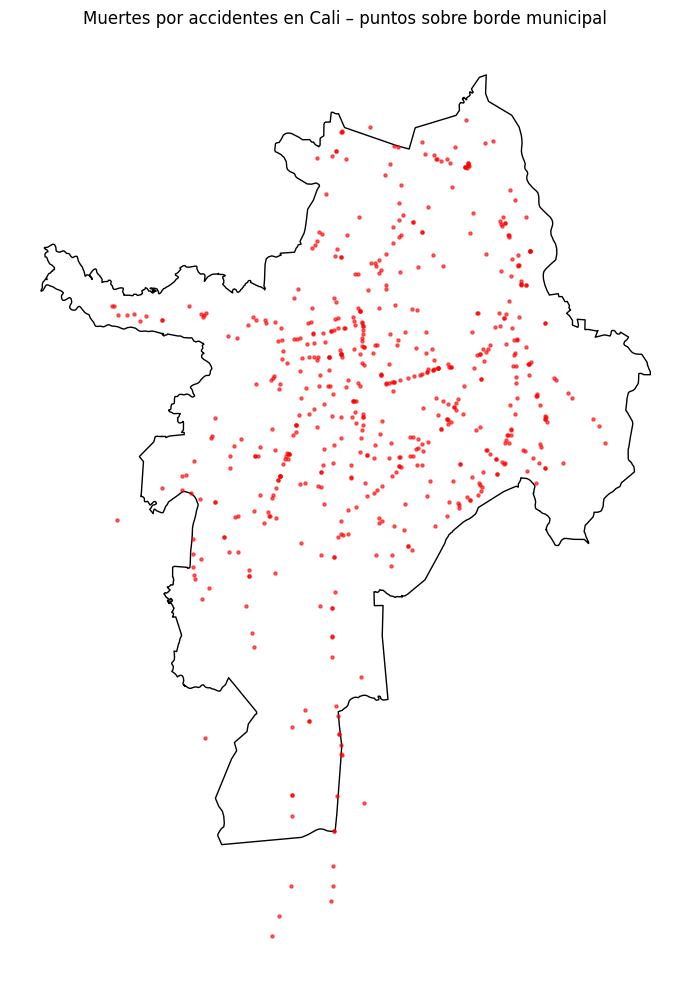

In [171]:
# --- Dependencias ---
import re
from pathlib import Path

import geopandas as gpd
from shapely.ops import unary_union
from shapely import make_valid  # shapely >= 2.0
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# 1) Configuración de rutas
# =========================
map_dir = Path(r"C:/Users/david/Desktop/Proyecto 2/Aplicaciones-del-Analisis-Espacial/casos/Situación_2/data/Mapas")

# Buscar todos los .shp
shps = list(map_dir.glob("*.shp"))
if not shps:
    raise FileNotFoundError(f"No se encontraron .shp en: {map_dir}")

# ==============================
# 2) Elegir el shapefile de borde
# ==============================
# Patrones similares a R: "bord|borde|limite|límite|boundary"
pattern = re.compile(r"(bord|borde|limite|límite|boundary)", flags=re.IGNORECASE)

candidates = [p for p in shps if pattern.search(p.name)]
borde_path = candidates[0] if candidates else shps[0]  # fallback al primero si no hay candidato claro
print(f"Usando borde: {borde_path.name}")

# =======================================
# 3) Leer shapefile, validar CRS y geometría
# =======================================
borde_sf = gpd.read_file(borde_path)

# make_valid (equivalente a st_make_valid)
# (GeoPandas 0.14+ tiene GeoSeries.make_valid(); con shapely>=2 usar make_valid)
borde_sf["geometry"] = borde_sf.geometry.apply(make_valid)

# Verificar CRS (equivalente a stopifnot(!is.na(st_crs(.))))
if borde_sf.crs is None:
    # ⚠️ Si conoces el CRS del borde, defínelo aquí en caso de venir vacío:
    # borde_sf = borde_sf.set_crs("EPSG:32618", allow_override=True)
    raise ValueError("El shapefile de borde no tiene CRS definido. Configúralo con .set_crs().")

borde_crs = borde_sf.crs
print(f"CRS del borde: {borde_crs}")

# ==================================================
# 4) Unificar geometría del borde (a un solo polígono)
# ==================================================
# st_union + st_as_sf en R  → unary_union y envolver en GeoDataFrame
borde_union_geom = unary_union(borde_sf.geometry)
borde_union = gpd.GeoDataFrame({"id": [1]}, geometry=[borde_union_geom], crs=borde_crs)

# =========================================================
# 5) Construir GeoDataFrame de puntos desde tu DataFrame df
# =========================================================
# Intentamos usar columnas en metros; si no existen, usamos las de km * 1000
if {"coordenada X (metros)", "coordenada Y (metros)"}.issubset(df.columns):
    x = df["coordenada X (metros)"]
    y = df["coordenada Y (metros)"]
elif {"coordenada X (km)", "coordenada Y (km)"}.issubset(df.columns):
    x = df["coordenada X (km)"] * 1000.0
    y = df["coordenada Y (km)"] * 1000.0
else:
    raise KeyError("No se encontraron columnas de coordenadas esperadas en df.")

# Crear puntos
gdf_pts = gpd.GeoDataFrame(
    df.copy(),
    geometry=gpd.points_from_xy(x, y),
    crs=borde_crs  # ⇐ Asumimos que las coord. están en el mismo CRS que el borde
)

# ── Nota sobre CRS de los puntos ─────────────────────────────────────
# Si SABES que las coordenadas del DataFrame están en otro CRS, cámbialo aquí:
# gdf_pts = gdf_pts.set_crs("EPSG:3116", allow_override=True)
# y luego reproyecta:
# gdf_pts = gdf_pts.to_crs(borde_crs)
# ────────────────────────────────────────────────────────────────────

# =======================================================
# 6) (Opcional) Heurística simple para detectar desajustes
# =======================================================
# Si los X están ~1,000,000, podría ser un sistema local con falsos orígenes.
# Si sospechas que están en otro CRS, establece el CRS correcto arriba y usa to_crs(borde_crs).
if gdf_pts.crs != borde_union.crs:
    gdf_pts = gdf_pts.to_crs(borde_union.crs)

# ============================
# 7) Plot del borde y los puntos
# ============================
fig, ax = plt.subplots(figsize=(10, 10))
borde_union.plot(ax=ax, color="white", edgecolor="black", linewidth=1)
gdf_pts.plot(ax=ax, markersize=5, color="red", alpha=0.6)

ax.set_title("Muertes por accidentes en Cali – puntos sobre borde municipal", fontsize=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [174]:
!pip install fiona

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.5 MB 52.4 MB/s eta 0:00:01
   --- ------------------------------------ 1.8/24.5 MB 3.9 MB/s eta 0:00:06
   --------------------------------- ------ 20.4/24.5 MB 32.3 MB/s eta 0:00:01
   ---------------------------------------- 24.5/24.5 MB 33.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
pd.crosstab(df['SEXO'], df['CATEGORIA_MOTOR'])


CATEGORIA_MOTOR,Automotor grande,Automotor mediano,Automotor pequeño,Sin Automotor
SEXO,,,,
F,15,23,70,5
M,77,86,292,21


<Axes: xlabel='DIA SEMANA ACCIDENTE'>

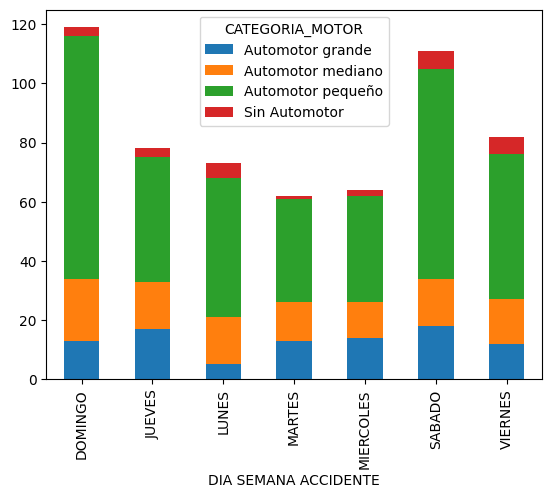

In [177]:
pd.crosstab(df['DIA SEMANA ACCIDENTE'], df['CATEGORIA_MOTOR']).plot(kind="bar", stacked=True)


---

#### Exportación de Datos

In [144]:
# Guardado de Datos
df.to_csv('data/output/Accidentes_2009_2010.csv', index=False)